# K-Means Clustering

## Importing the libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [33]:
df = pd.read_csv('Delhi_Climate.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB


In [35]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


In [36]:
df.shape

(1576, 5)

In [37]:
df.drop(columns=['date'], inplace=True)

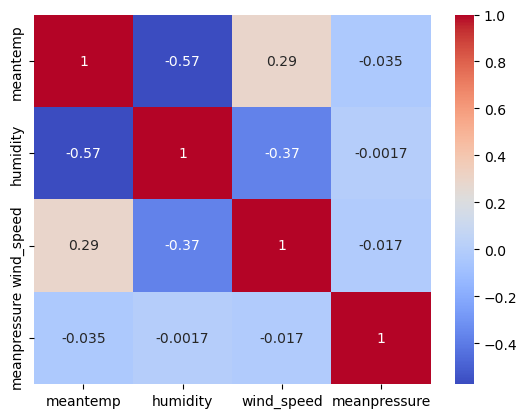

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [39]:
X = df.iloc[:,[0,1]].values

### Using the elbow method to find the optimal number of clusters

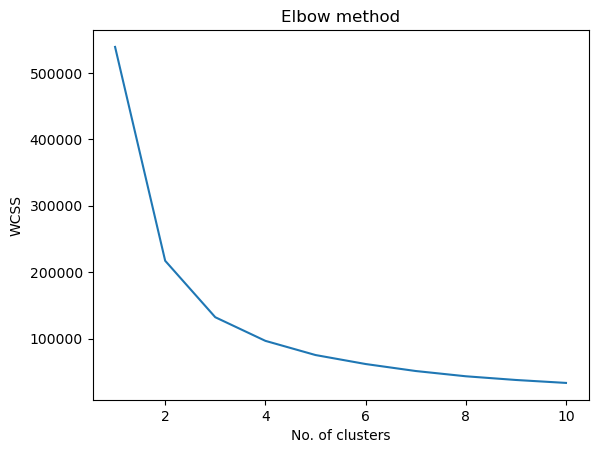

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++',random_state= 56)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

## Training the K-Means model on the dataset

In [41]:
kmeans = KMeans(n_clusters= 3, init='k-means++',random_state= 56)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=56)

### Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit()

In [42]:
# The lowest SSE value
kmeans.inertia_

132162.03880241222

In [43]:
kmeans.cluster_centers_ # Final locations of the centroid

array([[26.24823616, 59.05197062],
       [19.76136477, 77.77266161],
       [31.89825492, 35.38875855]])

In [44]:
kmeans.n_iter_ # The number of iterations required to converge

17

In [45]:
kmeans.labels_ #Finally, the cluster assignments 
#are stored as a one-dimensional NumPy array in kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

### Creating Output labels for Generating Graph

In [46]:
y_kmeans = kmeans.fit_predict(X)

In [47]:
print(y_kmeans)

[1 1 1 ... 2 2 2]


## Visualising the clusters

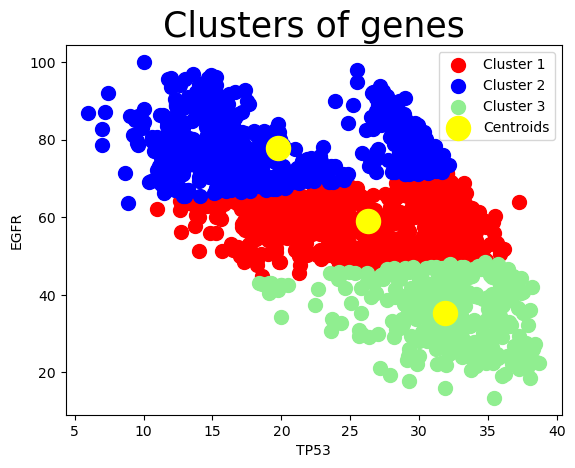

In [48]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100, c = 'red', label ="Cluster 1")
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100, c = 'blue', label ="Cluster 2")
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100, c = 'lightgreen', label ="Cluster 3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300, c = 'Yellow',label = 'Centroids')
plt.title("Clusters of genes",size = 25)
plt.xlabel("TP53")
plt.ylabel("EGFR")
plt.legend()
plt.show()

## Test Your Knowledge

### 1. For the model we created in lab session write the following results

### From Elbow Method graph the optimal no. of cluster is 3

### Cluster Inertia

In [49]:
# The lowest SSE value
kmeans.inertia_

132162.03880241222

### Cluster Centers

In [50]:
kmeans.cluster_centers_

array([[26.24823616, 59.05197062],
       [19.76136477, 77.77266161],
       [31.89825492, 35.38875855]])

### Number of iterations required to converge

In [51]:
kmeans.n_iter_

17

### Homogeneity_score

In [52]:
from sklearn.metrics import homogeneity_score
print(homogeneity_score(kmeans.labels_, y_kmeans))

1.0


### 2. Crete the model using following parameter setting and write down the result
#### n_clusters = 5
#### init = random
#### n_init = any number of your choice above 10
#### max_iter = 100 + your roll numbe
#### tol = 0.00001
#### random_state = any number of your choice

In [53]:
kmeans_1 = KMeans(n_clusters = 5, init = 'random',
                n_init = 14, max_iter = 167,
                tol = 0.00001, random_state = 53)
kmeans_1.fit(X)

KMeans(init='random', max_iter=167, n_clusters=5, n_init=14, random_state=53,
       tol=1e-05)

### Cluster Inertia

In [54]:
kmeans_1.inertia_

75257.4315182177

### Cluster Centers

In [55]:
kmeans_1.cluster_centers_

array([[27.8586844 , 52.1647406 ],
       [29.78770648, 69.11357881],
       [32.63557788, 32.02379261],
       [17.80392701, 67.02745197],
       [17.81365533, 84.20589972]])

### Number of iterations required to converge

In [56]:
kmeans_1.n_iter_

18

### Homogeneity_score

In [57]:
kmeans_1.labels_

array([4, 4, 4, ..., 2, 2, 2])

In [58]:
y_kmeans_1 = kmeans.fit_predict(X)

In [59]:
hs = homogeneity_score(kmeans_1.labels_, y_kmeans)
print('Homogeneity score = ', hs)

Homogeneity score =  0.4056927274313957
